Description: Analysis of Airbnb Texas Housing


In [234]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,2,$149,4,San Antonio,November 2010,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...
2,3,$59,1,Houston,January 2017,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...
3,4,$60,1,Bryan,February 2016,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
4,5,$75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...


# Get preliminary data on dataset 

In [235]:
listing_data.describe()

,Unnamed: 0,latitude,longitude
count,18259.000000,18225.000000,18225.000000
mean,9130.000000,30.684906,-97.076785
std,5271.063618,1.671008,1.328314
min,1.000000,25.894075,-103.690925
25%,4565.500000,29.693117,-97.817193
50%,9130.000000,30.275907,-97.134467
75%,13694.500000,32.671095,-96.307023
max,18259.000000,35.256299,-93.771139


Fixing Up columns 

In [236]:
listing_data.shape
# Here we can see that there are 18,259(adding one for the index since it starts at 0) observations

(18259, 10)

In [237]:
listing_data.columns

Index(['Unnamed: 0', 'average_rate_per_night', 'bedrooms_count', 'city',
       'date_of_listing', 'description', 'latitude', 'longitude', 'title',
       'url'],
      dtype='object')

# This following section will be to clean up the names 

In [238]:
listing_data.rename(columns={'average_rate_per_night':'rate'}, inplace=1)
listing_data.rename(columns = {'bedrooms_count':'bedrooms'}, inplace=1)
listing_data.rename(columns={'date_of_listing':'listing_date'}, inplace=1)

# We are cleaning up the names here, the ones before are too long so we are shortening them 

# Deleting/Changing values 
1. Dropping the first column
2. Dropping any rows with missing values
3. Replacing Studio with 0, this is to make the information cohesive and uniform

In [239]:
listing_data = listing_data.drop('Unnamed: 0', axis=1)

In [240]:
listing_data = listing_data.dropna()

In [241]:
listing_data['bedrooms'] = listing_data['bedrooms'].replace('Studio',0)
#listing_data.head(50)

In [242]:
listing_data['rate'] = listing_data['rate'].str[1:]
# Rate has the $ symbol

# Here I will be changing the variables to the desired/appropiate type

In [243]:
listing_data.dtypes
# As we can see we need to change some of the data to the appropiate type. Rate and bedrooms should be integers

rate             object
bedrooms         object
city             object
listing_date     object
description      object
latitude        float64
longitude       float64
title            object
url              object
dtype: object

In [244]:
listing_data['rate'] = listing_data['rate'].astype(int)
listing_data['bedrooms'] = listing_data['bedrooms'].astype(int)

In [245]:
listing_data.dtypes 

rate              int64
bedrooms          int64
city             object
listing_date     object
description      object
latitude        float64
longitude       float64
title            object
url              object
dtype: object

In [246]:
listing_data['city'] = listing_data['city'].astype(str)

**** Now that  *****
1. All the rows with missing values have been removed
2. Some columns have been converted to the correct type
3. Some columns have been replaced

# Grouping Together Major Areas

In [247]:
city_group = listing_data['rate'].groupby(listing_data['city'])

In [248]:
#print(city_group.mean())

In [249]:
print(listing_data[listing_data['city'] == 'Addison'].shape)

# I was curious how many of these listings were in Addison

(22, 9)


In [250]:
listing_data['city'].nunique()
# There are 504 different cities

504

**** In this segment, I create two different lists. One that covers the biggest cities in Texas and one that focuses on DFW(Dallas Forth-Worth specifically. ****

In [251]:
listing_copy = listing_data.copy()

In [252]:
k_city = ["Houston","Dallas", "San Antonio","Fort Worth","Arlington","Austin"]

maj_cities = (listing_copy[listing_copy['city'].isin(k_city)])


In [253]:
maj_cities.shape
#there are 6616 listings

(6616, 9)

In [254]:
maj_cities = maj_cities.reset_index(drop=True)
#Resetting Index

In [255]:
#maj_cities

**** This list focuses on the cities in the DFW region. ****

In [256]:
dfw_cities = ['Dallas','Plano','Irving','Fort Worth','Richardson','Addison','Frisco','Arlington','Carrollton','Southlake','Lewisville','Garland','Mckinney','Allen',
              'Coppell','Denton','Grapevine','Grand Prairie','Flower Mound','Mesquite','Bedford','Rockwall','Sunnyvale','Hurst','North Richland Hills','Sachse','Little Elm'
              'Keller','Lancaster','Burleson','The Colony','Cedar Hill','Euless','Wylie','Colleyville','Red Oak','Prosper','Weatherford','Mansfield','Farmers Branch'
              'Greenville','Alvarado','Aubrey','Cleburne', 'Waxahachie','Farmersville','Terrell','Justin','Duncanville','Argyle','Wilmer','Anna','Keene','Italy',
              'Haltom City','Roanoke','Commerce','Crowley','Granbury','Rainbow','Tolar','Krum','Wolfe City','Campbell','Palmer','Lipan','Poolville','Princeton','Springtown'
              'Paluxy','Aledo','Melissa','Crandall','Millsap','Alvord','Scurry','Rosser','Glen Rose','Lone Oak','Slidell','Kennedale','Forney','Mabank','Midlothian',
              'Lillian','Sanger','Haslet','Azle','Grandview','Pilot Point','Rowlett','Kaufman','Bridgeport','Ennis','Lake Dallas','Decatur','Seagoville','Ponder',
              'Caddo Mills','Godley','Maypearl','Dennis','Josephine','Naval Air Station/ Jrb','Boyd','Greenwood','Avalon','Westminster','Ferris','Paradise','Nemo','Whitt'
              ,'Elmo','Joshua','Royse City','Quinlan','Milford','Merit','Rhome','Bardwell','Weston','Venus','Rio Vista','Celeste','Copeville','Kemp','Celina','Nevada',
              'Hutchins','Cresson','Trophy Club','Peaster','Newark','Forreston','Fate','Lavon','Blue Ridge','Chico','Desoto']



In [257]:
def label_city (row):
   if row['city'] in dfw_cities :
      return 'Yes'
   return 'No'

In [258]:
listing_data['dfw'] = listing_data.apply(lambda row: label_city(row), axis=1)

In [259]:
listing_data.head(15)

,rate,bedrooms,city,listing_date,description,latitude,longitude,title,url,dfw
0,27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...,No
1,149,4,San Antonio,November 2010,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...,No
2,59,1,Houston,January 2017,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...,No
3,60,1,Bryan,February 2016,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...,No
4,75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...,Yes
5,250,4,Conroe,August 2016,"My place is close to Lake Conroe, family-frien...",30.370455,-95.385319,Gorgeous Home with Country Setting,https://www.airbnb.com/rooms/14466133?location...,No
6,129,3,Cedar Creek,March 2016,Rustic country retreat on 8 acres southeast of...,30.109838,-97.473417,Cozy and Quaint Country Retreat with Acreage.,https://www.airbnb.com/rooms/12491762?location...,No
7,25,1,Fort Worth,January 2016,This is a beautiful bedroom with a queen size ...,32.689611,-97.298161,Friendly Private Room in َQuiet Neighborhood,https://www.airbnb.com/rooms/18977363?location...,Yes
8,345,3,Rockport,February 2016,First class and comfortable condo with the bes...,28.103726,-97.025832,608 - Bayfront Condos,https://www.airbnb.com/rooms/17559848?location...,No
9,72,0,San Antonio,August 2013,Private entrance to your own \,29.480646,-98.495692,Cozy Historic Private Studio,https://www.airbnb.com/rooms/1588127?location=...,No


I want to analyze only the cities in the DFW area. In order to delete all the other entries, I am finding the index of the ones that are not an then droppin them from the dataset

In [260]:
index_names = listing_data[listing_data['dfw']=='No'].index

In [261]:
listing_data.drop(index_names, inplace= True)

In [262]:
listing_data.shape

(4390, 10)

In [263]:
listing_data.reset_index(drop=True)

,rate,bedrooms,city,listing_date,description,latitude,longitude,title,url,dfw
0,75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...,Yes
1,25,1,Fort Worth,January 2016,This is a beautiful bedroom with a queen size ...,32.689611,-97.298161,Friendly Private Room in َQuiet Neighborhood,https://www.airbnb.com/rooms/18977363?location...,Yes
2,65,1,Irving,July 2015,My cool and comfortable bedroom apartment feel...,32.862116,-97.002643,Cozy 1 bedroom/bathroom with pool,https://www.airbnb.com/rooms/7276294?location=...,Yes
3,116,1,Euless,September 2014,Gated Estate in the heart of the DFW metro. Se...,32.865348,-97.081034,Quiet Cozy Room,https://www.airbnb.com/rooms/4251773?location=...,Yes
4,250,2,Frisco,December 2014,This unique lakefront area is perfect for crea...,33.155776,-96.930439,Lake Lewisville Lakefront Convenient to Frisco,https://www.airbnb.com/rooms/4785810?location=...,Yes
5,100,0,Denton,November 2015,A converted carriage house walking distance to...,33.216140,-97.137757,Historic Converted Carriage House,https://www.airbnb.com/rooms/16650025?location...,Yes
6,194,3,Plano,August 2016,This beautiful home located in a nice and conv...,33.084953,-96.783469,Fully Renovated Vacation Home in North Plano,https://www.airbnb.com/rooms/15028039?location...,Yes
7,81,0,Arlington,September 2016,Our place is five to seven minutes directly no...,32.770390,-97.090012,Comfy Garage Apt + Pool Close to FUN!,https://www.airbnb.com/rooms/15190760?location...,Yes
8,499,7,Fort Worth,April 2017,"Sleeps 20 guests. Clean, cozy, laid back and q...",32.649946,-97.405986,Casa de Alexis Guesthome,https://www.airbnb.com/rooms/18366731?location...,Yes
9,25,1,Dallas,April 2016,LOW COST MOTEL STYLE PRIVATE ROOMS WITH DOOR L...,32.786636,-96.874669,"2. Available now, Private w-Key, TV-FREE Movies",https://www.airbnb.com/rooms/13568922?location...,Yes


# Dataset is ready to be analyzed!

* We can now begin descriptive stats, for this we import Matplotlib - a library for basic plotting, Numpy which is another library in python focused on matrices, arrays and high level math functions

Now that the data has been cleaned. We begin analyzing using descriptive stats on the different cities and their prices

In [264]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

We will start off examining in the major cities, the frequency of bedrooms, and price

Text(0, 0.5, 'average rate')

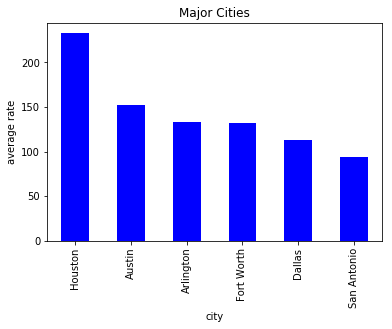

In [265]:
maj_cities.groupby("city").rate.mean().sort_values(ascending=False)[:].plot(kind='bar', color ='blue')
plt.title('Major Cities')
plt.ylabel('average rate')

#In one line of code we can create a bar graph. 

In [266]:
#My attempt here is to redo the bar chart above in a more organized fashion

maj_cities.groupby('city', as_index=False)['rate'].mean()

,city,rate
0,Arlington,132.768382
1,Austin,151.981043
2,Dallas,112.897727
3,Fort Worth,132.332665
4,Houston,232.611185
5,San Antonio,93.530662


* Here we can see that Houston commands the highest rate out of any city with an outstanding average rate of $232.62 USD per night
* Second is Austin with 151.98 per night

In [267]:
maj_cities['city'].value_counts(ascending=True)

Arlington       272
Fort Worth      998
Dallas         1144
San Antonio    1223
Austin         1477
Houston        1502
Name: city, dtype: int64

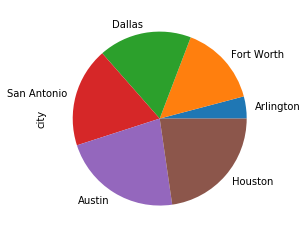

In [268]:
maj_cities['city'].value_counts(ascending=True).plot.pie()

* This here is another way to create the bar graph by establishing a dataframe dedicated to rate

In [269]:
ndf = maj_cities.groupby('city')['rate'].mean()
cr = pd.DataFrame(ndf)

Text(0, 0.5, 'rate')

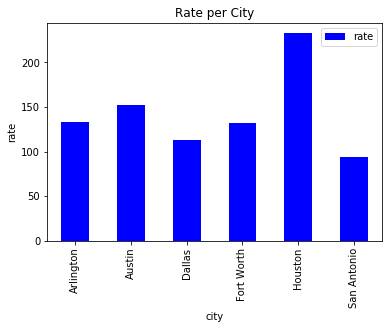

In [270]:
cr.plot(kind='bar', color='b')
plt.title('Rate per City')
plt.ylabel('rate')

* In the code below, I want to find out more about the type of apartment/house listing on Airbnb

Text(0.5, 1.0, 'Frequency of Apartment Type')

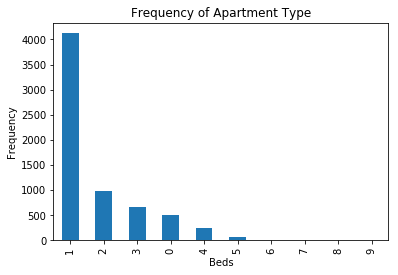

In [271]:
maj_cities['bedrooms'].value_counts().plot.bar()
maj_cities['bedrooms'].value_counts()
plt.xlabel('Beds')
plt.ylabel('Frequency')
plt.title('Frequency of Apartment Type')
# We can see from here that 1 bedrooms are the most popular type of listing with over 4,000 types one bedroom apartments being listed
# 977 Two bedrooms are listed
# Up until 4 bedrooms, the listings begin to just be double or single units

In [272]:
maj_cities.bedrooms.value_counts()

1    4122
2     977
3     665
0     511
4     254
5      63
6      10
7       9
8       3
9       2
Name: bedrooms, dtype: int64

* We can see that one bedrooms are the most common listing with over 4k listings being one bedroom listings

# Specific Houston v Dallas Comparison

* COmparing rate of bedrooms between Houston and Dallas
* Comparing bedroom frequency between the two

In [273]:
hbd = maj_cities.set_index('city')
hou = pd.DataFrame(hbd.loc[hbd.index.isin(['Houston'])])
dal = pd.DataFrame(hbd.loc[hbd.index.isin(['Dallas'])])

hou_dal = pd.DataFrame(hbd.loc[hbd.index.isin(['Dallas','Houston'])])
dalfa = pd.DataFrame(hbd.loc[hbd.index.isin(['Dallas','Fort Worth', "Arlington"])])

In [274]:
#hou and dal were to created to see individual dataframes
# hou_dal combines the two
#dalfa

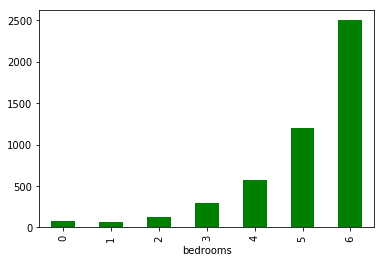

In [275]:
dal.groupby('bedrooms')['rate'].mean().plot(kind='bar', color='green')

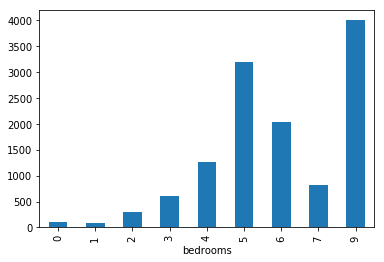

In [276]:
hou.groupby('bedrooms')['rate'].mean().plot(kind='bar')

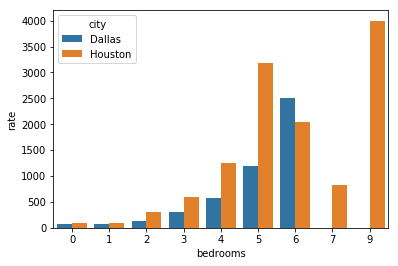

In [277]:
import seaborn as sns

hou_dal = hou_dal.groupby(['city' , 'bedrooms']).agg({'rate': 'mean'}).reset_index()
sns.barplot(data=hou_dal, x='bedrooms', y='rate', hue='city')

In [278]:
#hou_dal.groupby('bedrooms')['rate'].mean()

As we can see, Houston commands higher rates in every type of bedroom available. We can neglect the 7 and 9 bedroom options as Dallas does not have anything similar. 

In [279]:
dal.groupby('bedrooms')['rate'].mean()

bedrooms
0      78.780000
1      68.826823
2     131.224138
3     299.753846
4     567.483871
5    1201.800000
6    2500.000000
Name: rate, dtype: float64

In [280]:
hou.groupby('bedrooms')['rate'].mean()

bedrooms
0      97.243478
1      86.721827
2     307.028708
3     600.573643
4    1259.133333
5    3191.538462
6    2039.750000
7     825.000000
9    4000.000000
Name: rate, dtype: float64

# Dallas Forth Worth Arlington Analysis

In [281]:
dalfa.shape

(2414, 8)

In [282]:
dalfa.groupby('city')['rate'].mean()

city
Arlington     132.768382
Dallas        112.897727
Fort Worth    132.332665
Name: rate, dtype: float64

Here we can see that the average daily price is lower for Dallas and higher for FW and Arlington. 
* This is counterintuitive, since we would assume Dallas ia the more expensive city. We can check to see how the breakdown of rooms vs cost affects this

In [283]:
dalfa.groupby('city')['bedrooms'].value_counts()

city        bedrooms
Arlington   1           147
            3            47
            2            37
            4            22
            5            11
            0             6
            7             2
Dallas      1           768
            2           174
            0           100
            3            65
            4            31
            5             5
            6             1
Fort Worth  1           586
            2           167
            3           117
            0            63
            4            55
            5             5
            7             3
            8             2
Name: bedrooms, dtype: int64

In [284]:
dalfa.groupby(['city', 'bedrooms'])['rate'].mean()

city        bedrooms
Arlington   0             97.166667
            1             57.414966
            2            113.918919
            3            197.531915
            4            326.954545
            5            513.454545
            7            375.000000
Dallas      0             78.780000
            1             68.826823
            2            131.224138
            3            299.753846
            4            567.483871
            5           1201.800000
            6           2500.000000
Fort Worth  0             88.301587
            1             78.655290
            2            135.047904
            3            229.829060
            4            410.418182
            5            780.000000
            7            499.000000
            8           1500.000000
Name: rate, dtype: float64

Currently not able to get rid of all listings with over 5 rooms